In [64]:
from utils import *
import numpy as np
import os
from paq2py import *
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#the google sheet ID from the url
exp_log_s2 = '1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY'
sheet_name = '2019-03-19_RL025'
df = gsheet2df(exp_log_s2, HEADER_ROW=4, SHEET_NAME=sheet_name)

In [3]:
# spreadsheet settings

#the name of the file path column
t_series_header = 'Path (file or folder)'
paq_header = '.paq file'
naparm_header = 'NAPARM path'

#column telling whether to analyse or not
analyse_bool_header = 'Suite2p_me'


In [4]:
analyse_idx = df.index[df[analyse_bool_header]=='TRUE']
tseries_paths = [df.loc[idx,t_series_header] for idx in analyse_idx]
paq_paths = [df.loc[idx,paq_header] for idx in analyse_idx]
naparm_paths = [df.loc[idx,naparm_header] for idx in analyse_idx]

In [5]:
packerstation_path = '/home/jamesrowland/Documents/packerstation'

In [29]:
def path_conversion(path_list, packerstation_path = '/home/jamesrowland/Documents/packerstation'):
    
    '''converts local paths on 2p imaging computer to packerstation paths
       only works with data arrangement as of 2019-03-27 will likely break in the future
    '''
    
    p = path_list[0]
    name = p.split('\\')[2]
    date = p.split('\\')[3]
    
    local_path = os.path.join(packerstation_path, name, 'Data', date)
    
    converted_paths = [os.path.join(local_path, *p.split('\\')[4:]) for p in path_list]
    
    #get rid of weird quote marks
    converted_paths = [p.replace('"', '') for p in converted_paths]
    
    return converted_paths
                            

In [30]:
tseries_pstation = path_conversion(tseries_paths)
paqs_pstatition = path_conversion(paq_paths)
naparms_pstation = path_conversion(naparm_paths)


In [68]:
t

'/home/jamesrowland/Documents/packerstation/rlees/Data/2019-03-19/RL025/2019-03-19_RL025_t-007'

In [72]:
t = tseries_pstation[1]
paq = paq_read(paqs_pstatition[1])
binary = np.fromfile(t + '.bin')



In [73]:
paqs_pstatition[0]

'/home/jamesrowland/Documents/packerstation/rlees/Data/2019-03-19/RL025/2019-03-19_RL025_photostim_003.paq'

<IPython.core.display.Javascript object>


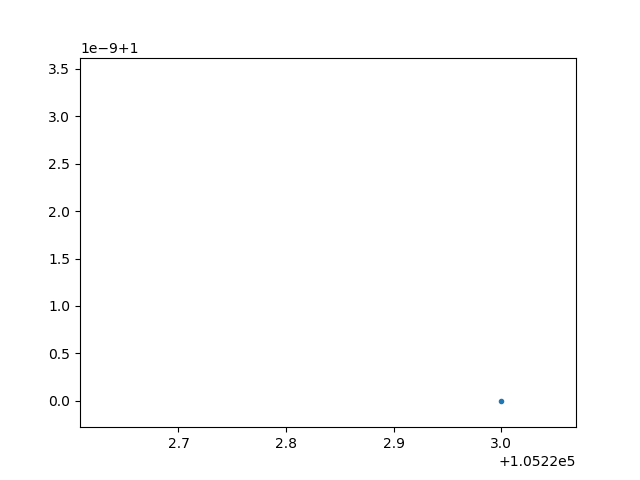

In [77]:
clock_idx = paq['chan_names'].index('frame_clock')
#voltage from the frame clock channel
clock_voltage = paq['data'][clock_idx, :]
clock_times = threshold_detect(clock_voltage, 4)
frame_clock = digitise_trigger(clock_voltage, min_time = 0.01*paq['rate'], max_time = 0.1*paq['rate'])
len(clock_times)
plt.plot(clock_times, np.ones(len(clock_times)), '.')
plt.plot(clock_voltage)



<IPython.core.display.Javascript object>


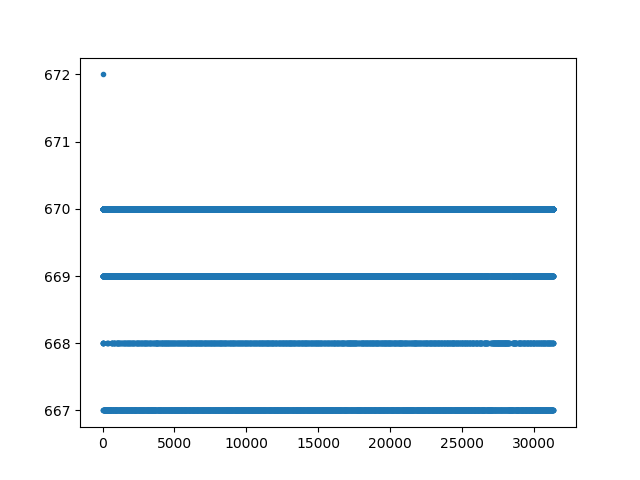

In [85]:
plt.figure()
plt.plot(np.diff(clock_times), '.')
plt.show()

In [79]:
len(clock_times)

31376

In [42]:
binary.shape

(411238400,)

In [ ]:
/home/jamesrowland/Documents/packerstation/rlees/Data/2019-03-19/RL025/2019-03-19_RL025_B2_2P_003.paq

In [63]:
(len(binary) - 5) / 6281

65473.39516000637